# Data Science Homework - 4
## Question1: Cancer Diagnosis Using Machine Learning

In [2]:
import pandas as pd # import package panda and save as pd

A_Cancer_df = pd.read_csv('C:/Users/afara/Documents/DS Lab/Cancer.csv') # reading a CSV file directly from Local device, and save as df

A_Cancer_df[::10]

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Malignant_Cancer
0,5,1,1,1,2,1,3,1,1,0
10,5,3,3,3,2,3,4,4,1,1
20,5,4,4,9,2,10,5,6,1,1
30,9,5,8,1,2,3,2,1,5,1
40,5,3,5,5,3,3,4,10,1,1
50,5,1,3,1,2,1,2,1,1,0
60,2,2,2,1,1,1,7,1,1,0
70,1,1,1,1,2,1,3,1,1,0
80,10,3,5,1,10,5,3,10,2,1
90,1,3,1,2,2,2,5,3,2,0


In [3]:
# Creating the Feature Matrix
feature_cols = ['Clump_Thickness', 'Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']

# use the above list to select the features from the original DataFrame
A = A_Cancer_df[feature_cols]

A[::10]

print(A.shape)

(150, 9)


In [4]:
f = A_Cancer_df['Malignant_Cancer'] # this is the original labels.

f[::10]

0      0
10     1
20     1
30     1
40     1
50     0
60     0
70     0
80     1
90     0
100    1
110    1
120    1
130    1
140    0
Name: Malignant_Cancer, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

A_train,A_test,f_train,f_test = train_test_split (A, f, test_size=0.35, random_state=3) #split the data basis on this perameter.

In [6]:
from sklearn.tree import DecisionTreeClassifier # import DecisionTreeClassifier.

my_DecisionTree = DecisionTreeClassifier(random_state=3) # instantiat an object of DecisionTreeClassifier.

my_DecisionTree.fit(A_train, f_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=3,
            splitter='best')

In [7]:
f_predict = my_DecisionTree.predict(A_test)

print(f_predict)

[0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1]


In [8]:
from sklearn.metrics import accuracy_score # import accuracy_score from sklearn.metrics

dt_accuracy = accuracy_score(f_test, f_predict)

print(dt_accuracy)

0.8301886792452831


In [ ]:
from sklearn.utils import resample # import resample from sklearn
import numpy as nm # import numpy package

#bootstarp_size = 0.8
for i in range(18):
    resample(A_train, n_samples = bootstarp_size , random_state=i , replace = True)

## Question2: predict the probability of Heart Disease

In [1]:
import pandas as pd # import package panda and save as pd
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score # import accuracy_score from sklearn.metrics
from sklearn import metrics
import matplotlib.pyplot as plt # Import "pyplot" package of "matplotlib" to generate graphs and plot curves


In [7]:

A_Hearts_short_df = pd.read_csv('C:/Users/Abhilash/Heart_short.csv') # reading a CSV file directly from Local device, and save as df

df.head()

,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak,AHD
0,63,145,233,2,150,2.3,No
1,67,160,286,2,108,1.5,Yes
2,67,120,229,2,129,2.6,Yes
3,37,130,250,0,187,3.5,No
4,41,130,204,2,172,1.4,No


In [8]:
# normalize the dataset

A_Hearts_short_df["Age"]=((A_Hearts_short_df["Age"]-A_Hearts_short_df["Age"].min())/(A_Hearts_short_df["Age"].max()-A_Hearts_short_df["Age"].min()))*1
A_Hearts_short_df["RestBP"]=((A_Hearts_short_df["RestBP"]-A_Hearts_short_df["RestBP"].min())/(A_Hearts_short_df["RestBP"].max()-A_Hearts_short_df["RestBP"].min()))*1
A_Hearts_short_df["Chol"]=((A_Hearts_short_df["Chol"]-A_Hearts_short_df["Chol"].min())/(A_Hearts_short_df["Chol"].max()-A_Hearts_short_df["Chol"].min()))*1
A_Hearts_short_df["RestECG"]=((A_Hearts_short_df["RestECG"]-A_Hearts_short_df["RestECG"].min())/(A_Hearts_short_df["RestECG"].max()-A_Hearts_short_df["RestECG"].min()))*1
A_Hearts_short_df["MaxHR"]=((A_Hearts_short_df["MaxHR"]-A_Hearts_short_df["MaxHR"].min())/(A_Hearts_short_df["MaxHR"].max()-A_Hearts_short_df["MaxHR"].min()))*1
A_Hearts_short_df["Oldpeak"]=((A_Hearts_short_df["Oldpeak"]-A_Hearts_short_df["Oldpeak"].min())/(A_Hearts_short_df["Oldpeak"].max()-A_Hearts_short_df["Oldpeak"].min()))*1

A_Hearts_short_df.head()

,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak,AHD
0,0.708333,0.481132,0.244292,1.0,0.603053,0.370968,No
1,0.791667,0.622642,0.365297,1.0,0.282443,0.241935,Yes
2,0.791667,0.245283,0.235160,1.0,0.442748,0.419355,Yes
3,0.166667,0.339623,0.283105,0.0,0.885496,0.564516,No
4,0.250000,0.339623,0.178082,1.0,0.770992,0.225806,No


In [ ]:
# Creating the Feature Matrix
feature_cols = ['Age', 'RestBP', 'Chol', 'RestECG', 'MaxHR', 'Oldpeak']

# use the above list to select the features from the original DataFrame
A = df[feature_cols]

A[::10]

print(A.shape)

In [152]:
f = A_Hearts_short_df['AHD'] # this is the original labels.

f[::10]

0       No
10      No
20      No
30      No
40      No
50      No
60      No
70      No
80      No
90      No
100     No
110     No
120     No
130     No
140     No
150    Yes
160     No
170    Yes
180     No
190     No
200     No
210    Yes
220     No
230     No
240     No
250    Yes
260    Yes
270    Yes
280     No
Name: AHD, dtype: object

In [162]:
A_train, A_test, f_train, f_test = train_test_split (A, f, test_size=0.25, random_state=3) #split the data basis on this perameter.

heart_logreg = LogisticRegression()
heart_logreg.fit(A_train, f_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [155]:
hrt_predict_lr = heart_logreg.predict(A_test)
print(hrt_predict_lr)

['Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes'
 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No'
 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes'
 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes'
 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No']


In [156]:
accuracy_log_rg = accuracy_score(f_test, hrt_predict_lr)
print(accuracy_log_rg)

0.7183098591549296


In [157]:
hrt_predict_prob_lr = heart_logreg.predict_proba(A_test)

print(f_test)
print(hrt_predict_prob_lr)
print(hrt_predict_prob_lr[:,1])

253     No
74     Yes
230     No
38     Yes
16     Yes
66      No
31     Yes
123    Yes
177    Yes
175     No
155    Yes
259     No
50      No
82     Yes
25      No
73     Yes
264    Yes
162    Yes
214    Yes
270    Yes
84     Yes
157     No
196     No
46      No
229    Yes
193     No
64      No
65      No
108     No
252    Yes
      ... 
58      No
14      No
266     No
161     No
225    Yes
83      No
205     No
23     Yes
43      No
67      No
24     Yes
200     No
61     Yes
198     No
247     No
5       No
136    Yes
154     No
145     No
235     No
208     No
40      No
102    Yes
146    Yes
168     No
15      No
78      No
109     No
122     No
142     No
Name: AHD, Length: 71, dtype: object
[[0.45551036 0.54448964]
 [0.57378484 0.42621516]
 [0.41900442 0.58099558]
 [0.39936239 0.60063761]
 [0.85816519 0.14183481]
 [0.77196984 0.22803016]
 [0.73676454 0.26323546]
 [0.88371314 0.11628686]
 [0.34726886 0.65273114]
 [0.68541689 0.31458311]
 [0.10560825 0.89439175]
 [0.92042897 0.07

In [164]:
fpr, tpr, thresholds = metrics.roc_curve(f_test, hrt_predict_prob_lr[:,1], pos_label=1)

AUC = metrics.auc(fpr, tpr)
print(AUC)

nan


C:\Users\afara\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


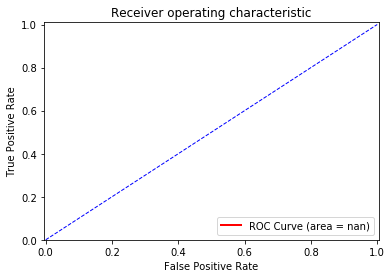

In [160]:

# rather than openng a new figure window:
%matplotlib inline # for the figures to keeping inside the explorer page 

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

In [161]:
# create a python list of feature names that would like to pick from the dataset:
feature_cols2 = ['RestBP','Chol']

# use the above list to select the features from the original DataFrame
A2 = A_Hearts_short_df[feature_cols2] 

# select a Series of labels (the last column) from the DataFrame
f2 = A_Hearts_short_df['AHD']

#Splitting the data
A_train2, A_test2, f_train2, f_test2 = train_test_split(A2, f2, test_size=0.2, random_state=3)

my_logreg2 = LogisticRegression()
my_logreg2.fit(A_train2, f_train2)

# Predicting the Binary Label:
hrt_predict_lr2 = my_logreg2.predict(A_test2)

# Estimating the probability (likelihood) of Each Label: 
hrt_predict_prob_lr2 = my_logreg2.predict_proba(A_test2)

fpr2, tpr2, thresholds2 = metrics.roc_curve(f_test2, hr_predict_prob_lr2[:,1], pos_label=1)
AUC2 = metrics.auc(fpr2, tpr2)
print(AUC2)

NameError: name 'hr_predict_prob_lr2' is not defined

NameError: name 'fpr2' is not defined

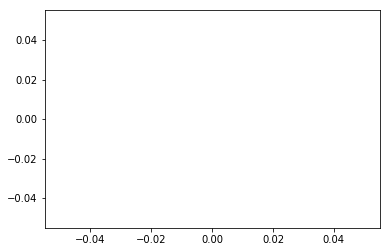

In [147]:
# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
%matplotlib inline

plt.figure()

# Roc Curve1:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Roc Curve2:
plt.plot(fpr2, tpr2, color='green', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC2)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()